In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
idh = pd.read_csv('Indicadores Atlas.csv', encoding='ISO-8859-1', delimiter=';')

idh.head()

,ANO,NOME_AGREGA,AGREGA,ESPVIDA,MORT1,T_ENV,RAZDEP,ANOSEST,T_ANALF15M,T_ANALF18M,...,POP25M,POP65M,POPT,POPTOT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM_E,IDHM_L,IDHM_R,IDHM
0,2011,RO,11,"70,32","22,24","5,29","45,77","7,60","9,74","10,66",...,932158,89420,1573035,1587902,"0,557","0,637","0,609","0,755","0,697","0,687"
1,2012,RO,11,"70,53","21,75","4,99","44,60","7,94","8,57","9,26",...,945728,85458,1633695,1649946,"0,558","0,672","0,632","0,759","0,703","0,698"
2,2013,RO,11,"70,74","21,27","5,60","43,78","7,80","8,56","9,24",...,987618,97140,1644167,1670217,"0,544","0,675","0,628","0,762","0,699","0,696"
3,2014,RO,11,"70,94","20,82","5,76","45,20","8,31","8,34","8,88",...,1004055,101017,1641072,1657696,"0,585","0,713","0,667","0,766","0,711","0,715"
4,2015,RO,11,"71,14","20,38","7,13","45,02","8,35","8,01","8,65",...,1041828,126433,1747811,1755648,"0,573","0,697","0,653","0,769","0,703","0,708"


In [4]:
idh.isnull().mean()[idh.isnull().any()==True].sort_values(ascending=False)
idh.isnull().sum().sum()

Series([], dtype: float64)

0

In [5]:
to_float = idh.select_dtypes(include='object').columns.drop('NOME_AGREGA')

for col in to_float:
    idh[col] = idh[col].str.replace(',', '.').astype('float')

idh.dtypes

ANO                    int64
NOME_AGREGA           object
AGREGA                 int64
ESPVIDA              float64
MORT1                float64
T_ENV                float64
RAZDEP               float64
ANOSEST              float64
T_ANALF15M           float64
T_ANALF18M           float64
T_ANALF25M           float64
T_ATRASO_2_BASICO    float64
T_ATRASO_2_FUND      float64
T_FLBAS              float64
T_FLFUND             float64
T_FLMED              float64
T_FLSUPER            float64
T_FREQ5A6            float64
T_FREQ6A14           float64
T_FREQ15A17          float64
T_FREQ18A24          float64
T_FUND11A13          float64
T_FUND15A17          float64
T_FUND18M            float64
T_FUND18A24          float64
T_FUND25M            float64
T_MED18A20           float64
T_MED25M             float64
T_SUPER25M           float64
R1040                float64
                      ...   
RDPCT                float64
RIND                 float64
RMPOB                float64
RPOB          

In [6]:
idh['ANO'].value_counts()

2015    37
2014    37
2013    37
2012    37
2011    37
Name: ANO, dtype: int64

In [7]:
idh_2011 = idh[idh['ANO']==2011].copy()
idh_2012 = idh[idh['ANO']==2012].copy()
idh_2013 = idh[idh['ANO']==2013].copy()
idh_2014 = idh[idh['ANO']==2014].copy()
idh_2015 = idh[idh['ANO']==2015].copy()

In [8]:
idh.columns

Index(['ANO', 'NOME_AGREGA', 'AGREGA', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP',
       'ANOSEST', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'T_FREQ5A6', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND11A13', 'T_FUND15A17', 'T_FUND18M', 'T_FUND18A24',
       'T_FUND25M', 'T_MED18A20', 'T_MED25M', 'T_SUPER25M', 'R1040', 'R2040',
       'RDPC', 'RDPC1', 'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'RDPCT',
       'RIND', 'RMPOB', 'RPOB', 'PRENTRAB', 'PIND', 'PMPOB', 'PPOB', 'GINI',
       'THEIL', 'POP', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18M', 'POP18A20', 'POP18A24', 'POP25M', 'POP65M', 'POPT',
       'POPTOT', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHM_E', 'IDHM_L', 'IDHM_R',
       'IDHM'],
      dtype='object')

In [9]:
mapa = gpd.read_file('Brasil.json', driver='JSON', crs={'init': 'epsg:4326'})

In [10]:
mapa.head()

,UF,ESTADO,REGIAO,geometry
0,AC,Acre,NO,"POLYGON ((-68.61895 -11.129709, -68.685345 -11..."
1,AL,Alagoas,NE,"POLYGON ((-36.431494 -10.448229, -36.473394 -1..."
2,AP,Amapá,NO,"(POLYGON ((-51.909319 -1.165791, -51.965264 -1..."
3,AM,Amazonas,NO,"POLYGON ((-63.47887 2.198446, -63.439548 2.092..."
4,BA,Bahia,NE,"(POLYGON ((-45.959232 -14.897264, -45.935374 -..."


In [11]:
escolas = pd.read_csv('ESCOLAS.CSV', delimiter='|', encoding='ISO-8859-1')

escolas.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
0,2015,23181737,AFONSO GONCALVES DE FREITAS EEF,00015,1,02/02/2015,18/12/2015,2,2304,23020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,33134707,JARDIM DOS PIRILAMPOS CRECHE MATERNAL LTDA,0170P,1,02/02/2015,18/12/2015,3,3306,33018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,15543064,E M E F BRANCA DE NEVE,00010,1,02/02/2015,24/12/2015,1,1505,15015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,42142989,CENTRO MUNICIPAL DE EDUCACAO INFANTIL COMECINH...,00010,1,05/02/2015,18/12/2015,4,4201,42004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,13072366,ESCOLA MUNICIPAL IPIRANGA,MI413,1,09/03/2015,18/12/2015,1,1304,13013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
escolas['CO_UF'].unique()

array([23, 33, 15, 42, 13, 31, 25, 43, 22, 52, 11, 41, 29, 12, 26, 21, 51,
       32, 35, 53, 24, 17, 50, 16, 28, 27, 14], dtype=int64)

In [13]:
escolas['CO_UF'] = escolas['CO_UF'].map({11: 'RO',
                                         12: 'AC',
                                         13: 'AM',
                                         14: 'RR',
                                         15: 'PA',
                                         16: 'AP',
                                         17: 'TO',
                                         21: 'MA',
                                         22: 'PI',
                                         23: 'CE',
                                         24: 'RN',
                                         25: 'PB',
                                         26: 'PE',
                                         27: 'AL',
                                         28: 'SE',
                                         29: 'BA',
                                         31: 'MG',
                                         32: 'ES',
                                         33: 'RJ',
                                         35: 'SP',
                                         41: 'PR',
                                         42: 'SC',
                                         43: 'RS',
                                         50: 'MS',
                                         51: 'MT',
                                         52: 'GO',
                                         53: 'DF'
                                         })

In [14]:
count_escolas = pd.DataFrame(escolas['CO_UF'].value_counts()).reset_index().rename(columns={'index': 'UF', 'CO_UF': 'NUM_ESCOLAS'})
count_escolas

,UF,NUM_ESCOLAS
0,SP,36219
1,MG,29646
2,BA,27629
3,MA,17512
4,CE,15970
5,PA,15949
6,RJ,15279
7,RS,14043
8,PE,13920
9,PR,11576


In [15]:
atlas_2015 = idh_2015[idh_2015['NOME_AGREGA'].isin(count_escolas['UF'])][['NOME_AGREGA',
                                                                          'POPTOT',
                                                                          'POP6A17',
                                                                          'IDHM',
                                                                          'I_ESCOLARIDADE',
                                                                          'I_FREQ_PROP',
                                                                          'MORT1',
                                                                          'ANOSEST',
                                                                          'T_ANALF15M',
                                                                          'T_ANALF18M',
                                                                          'T_ANALF25M',
                                                                          'T_ATRASO_2_BASICO',
                                                                          'T_ATRASO_2_FUND',
                                                                          'T_FLBAS',
                                                                          'T_FLFUND',
                                                                          'T_FLMED',
                                                                          'T_FLSUPER',
                                                                          'T_FREQ15A17',
                                                                          'T_FREQ18A24',
                                                                          'T_FREQ5A6',
                                                                          'T_FREQ6A14',
                                                                          'T_FUND11A13',
                                                                          'T_FUND15A17',
                                                                          'T_FUND18A24',
                                                                          'T_FUND18M',
                                                                          'T_FUND25M',
                                                                          'T_MED18A20',
                                                                          'T_MED25M',
                                                                          'T_SUPER25M',
                                                                        ]]

In [16]:
dados_educacao_2015 = count_escolas.merge(atlas_2015, left_on='UF', right_on='NOME_AGREGA').drop('NOME_AGREGA', axis=1)

In [17]:
mapa_educacao_2015 = gpd.GeoDataFrame(dados_educacao_2015.merge(mapa, on='UF'))
mapa_educacao_2015['ESCOLAS/POP'] = mapa_educacao_2015['NUM_ESCOLAS']/mapa_educacao_2015['POPTOT']
mapa_educacao_2015['ESCOLAS/POP6A17'] = mapa_educacao_2015['NUM_ESCOLAS']/mapa_educacao_2015['POP6A17']

In [18]:
mapa_educacao_2015.head()

,UF,NUM_ESCOLAS,POPTOT,POP6A17,IDHM,I_ESCOLARIDADE,I_FREQ_PROP,MORT1,ANOSEST,T_ANALF15M,...,T_FUND18M,T_FUND25M,T_MED18A20,T_MED25M,T_SUPER25M,ESTADO,REGIAO,geometry,ESCOLAS/POP,ESCOLAS/POP6A17
0,SP,36219,42074767,7345010,0.819,0.720,0.859,10.16,9.99,3.53,...,72.00,68.55,65.87,53.60,18.46,São Paulo,SE,"(POLYGON ((-53.049695 -22.550382, -53.068447 -...",0.000861,0.004931
1,MG,29646,20680736,3634776,0.769,0.580,0.785,11.41,8.53,6.79,...,58.00,53.14,55.12,39.88,12.04,Minas Gerais,SE,"POLYGON ((-50.929553 -19.451688, -50.801778 -1...",0.001434,0.008156
2,BA,27629,14984863,3153150,0.698,0.537,0.679,18.11,7.71,13.52,...,53.68,49.68,39.99,36.90,7.28,Bahia,NE,"(POLYGON ((-45.959232 -14.897264, -45.935374 -...",0.001844,0.008762
3,MA,17512,6681109,1726450,0.677,0.521,0.723,22.37,7.12,18.81,...,52.10,46.05,45.09,31.90,6.48,Maranhão,NE,"(POLYGON ((-45.809741 -10.324788, -45.886418 -...",0.002621,0.010143
4,CE,15970,8688588,1771921,0.715,0.546,0.779,15.07,7.44,17.33,...,54.59,48.81,53.92,33.89,7.22,Ceará,NE,"POLYGON ((-40.47409 -7.415163, -40.510212 -7.3...",0.001838,0.009013


In [19]:
mapa_educacao_2015.columns

Index(['UF', 'NUM_ESCOLAS', 'POPTOT', 'POP6A17', 'IDHM', 'I_ESCOLARIDADE',
       'I_FREQ_PROP', 'MORT1', 'ANOSEST', 'T_ANALF15M', 'T_ANALF18M',
       'T_ANALF25M', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS',
       'T_FLFUND', 'T_FLMED', 'T_FLSUPER', 'T_FREQ15A17', 'T_FREQ18A24',
       'T_FREQ5A6', 'T_FREQ6A14', 'T_FUND11A13', 'T_FUND15A17', 'T_FUND18A24',
       'T_FUND18M', 'T_FUND25M', 'T_MED18A20', 'T_MED25M', 'T_SUPER25M',
       'ESTADO', 'REGIAO', 'geometry', 'ESCOLAS/POP', 'ESCOLAS/POP6A17'],
      dtype='object')

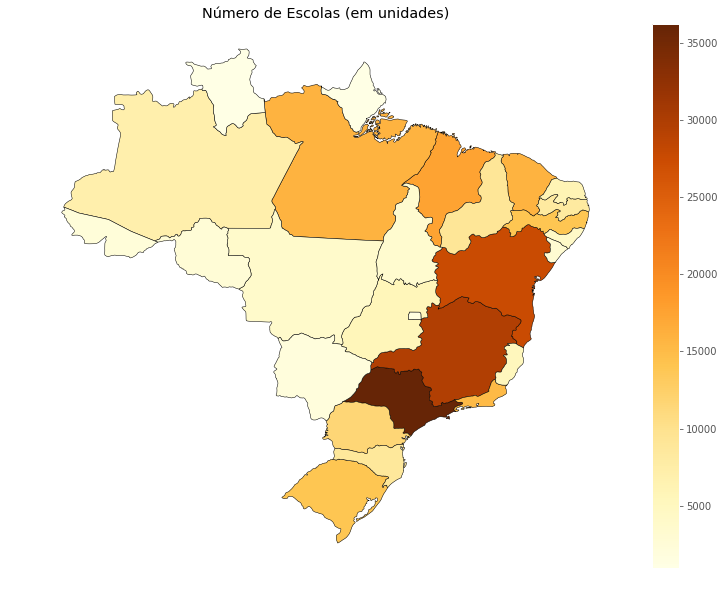

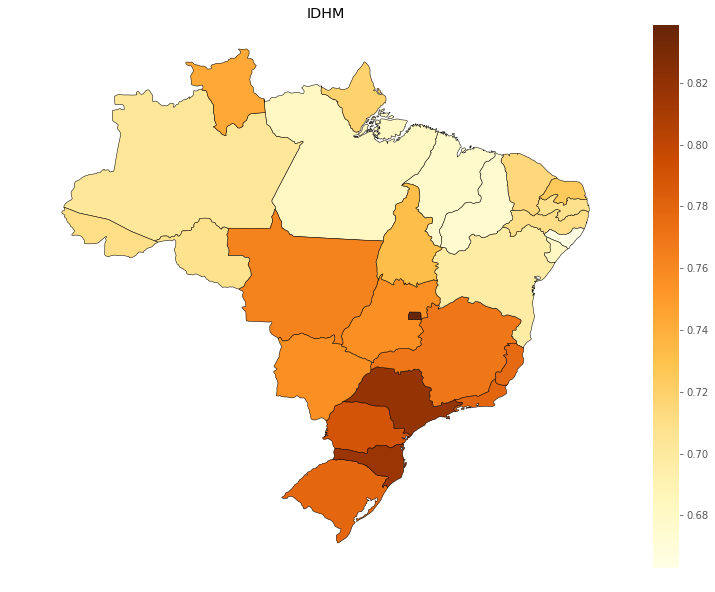

In [20]:
fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='NUM_ESCOLAS', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Número de Escolas (em unidades)')
_ = ax.axis('off')

plt.show()

fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='IDHM', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.axis('off')
_ = ax.set_title('IDHM')

plt.show()

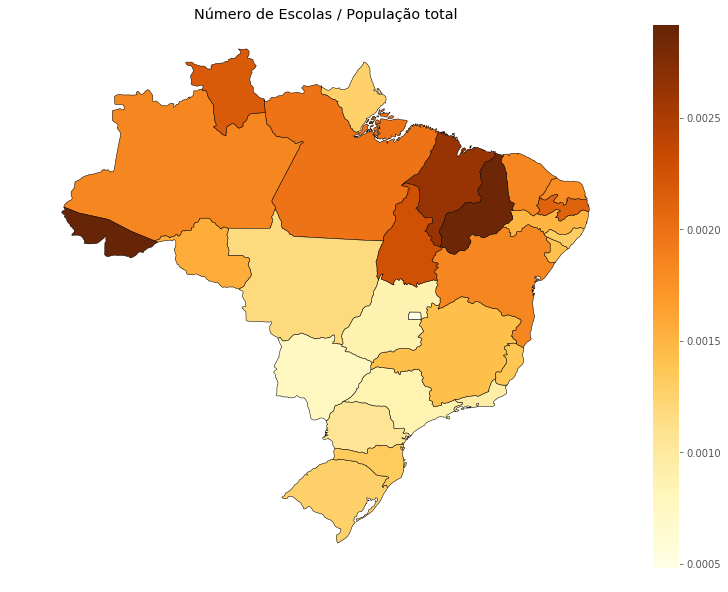

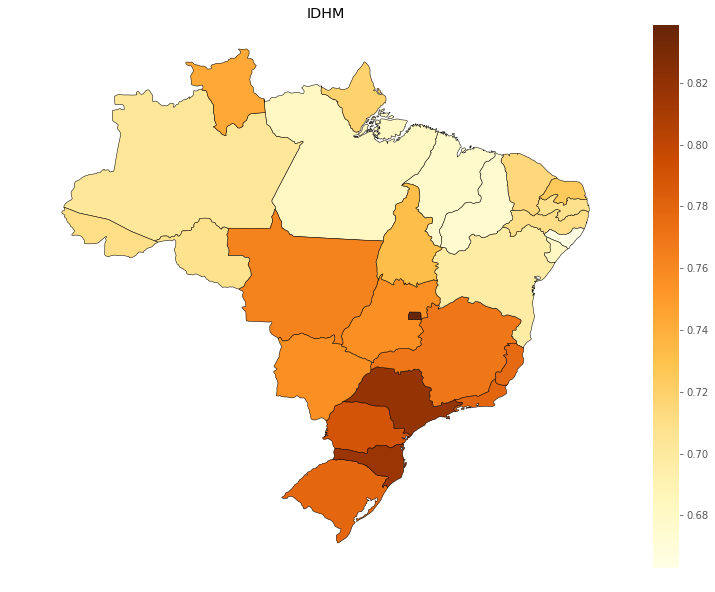

In [21]:
fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ESCOLAS/POP', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Número de Escolas / População total')
_ = ax.axis('off')

plt.show()

fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='IDHM', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.axis('off')
_ = ax.set_title('IDHM')

plt.show()

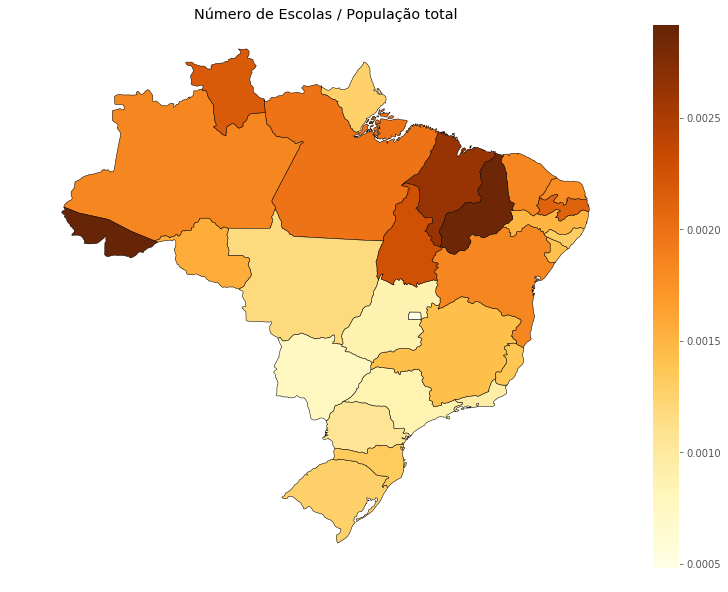

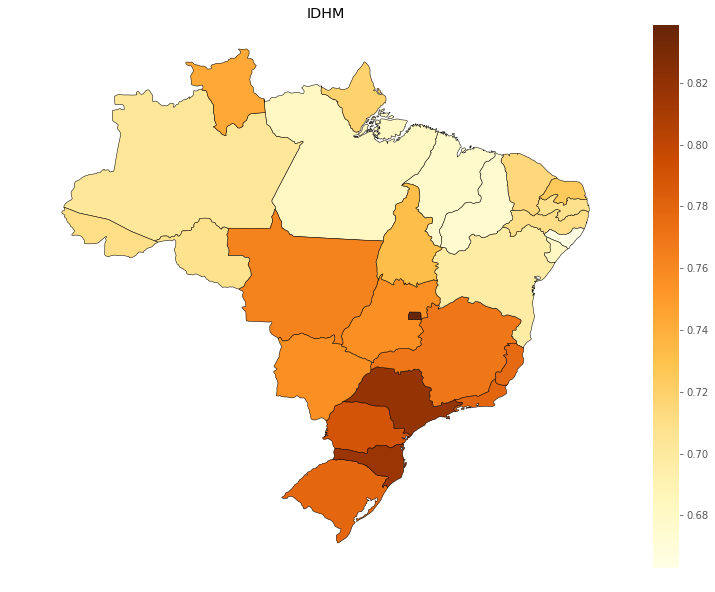

In [22]:
fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='ESCOLAS/POP', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.set_title('Número de Escolas / População total')
_ = ax.axis('off')

plt.show()

fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='IDHM', ax=ax, legend=True, cmap='YlOrBr', edgecolor='black')
_ = ax.axis('off')
_ = ax.set_title('IDHM')

plt.show()

In [23]:
mapa_educacao_2015.columns

Index(['UF', 'NUM_ESCOLAS', 'POPTOT', 'POP6A17', 'IDHM', 'I_ESCOLARIDADE',
       'I_FREQ_PROP', 'MORT1', 'ANOSEST', 'T_ANALF15M', 'T_ANALF18M',
       'T_ANALF25M', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS',
       'T_FLFUND', 'T_FLMED', 'T_FLSUPER', 'T_FREQ15A17', 'T_FREQ18A24',
       'T_FREQ5A6', 'T_FREQ6A14', 'T_FUND11A13', 'T_FUND15A17', 'T_FUND18A24',
       'T_FUND18M', 'T_FUND25M', 'T_MED18A20', 'T_MED25M', 'T_SUPER25M',
       'ESTADO', 'REGIAO', 'geometry', 'ESCOLAS/POP', 'ESCOLAS/POP6A17'],
      dtype='object')

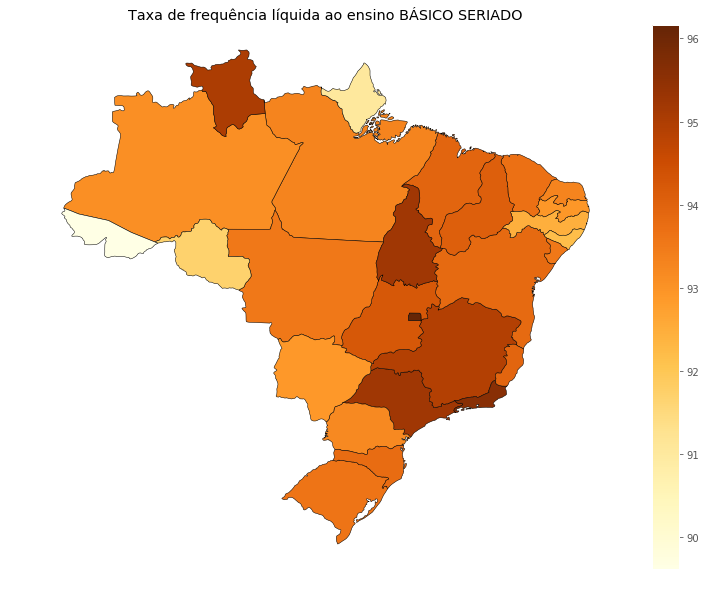

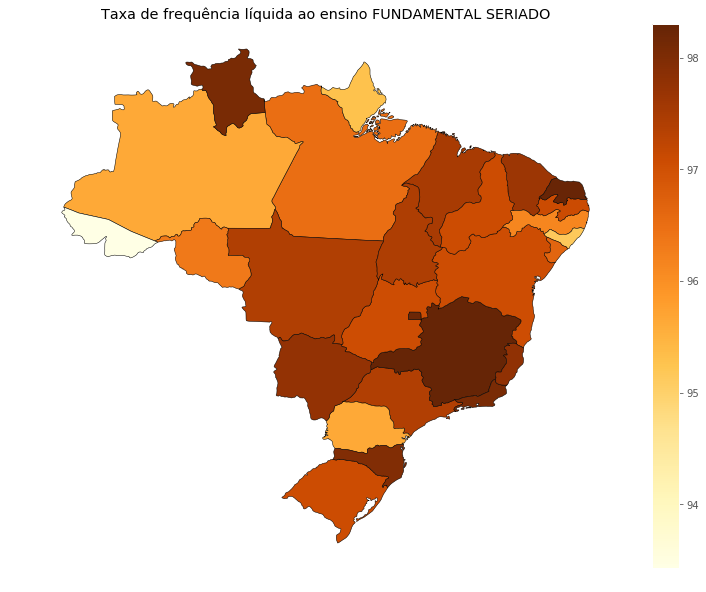

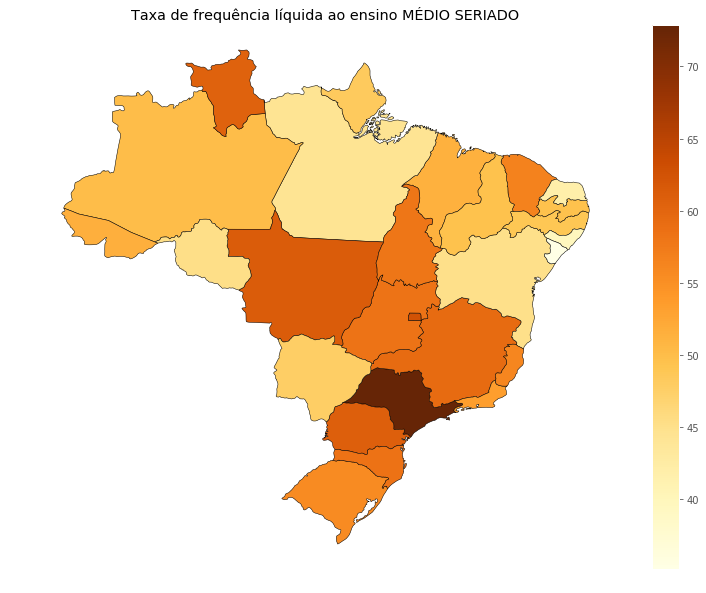

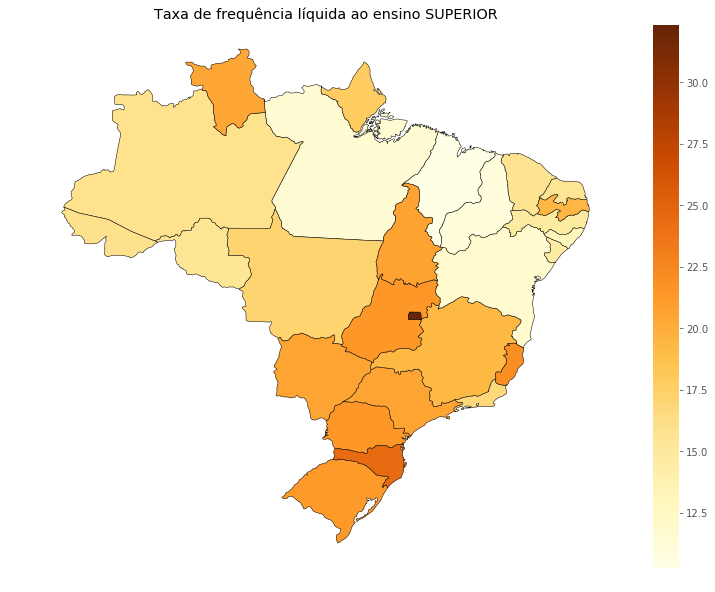

In [24]:
fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLBAS', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino BÁSICO SERIADO')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLFUND', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino FUNDAMENTAL SERIADO')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLMED', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino MÉDIO SERIADO')
_ = ax.axis('off')

plt.show()


fig, ax = plt.subplots(figsize=(13, 10))
_ = mapa_educacao_2015.plot(column='T_FLSUPER', ax=ax, cmap='YlOrBr', edgecolor='black', legend=True)
_ = ax.set_title('Taxa de frequência líquida ao ensino SUPERIOR')
_ = ax.axis('off')

plt.show()

D:\Anaconda\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


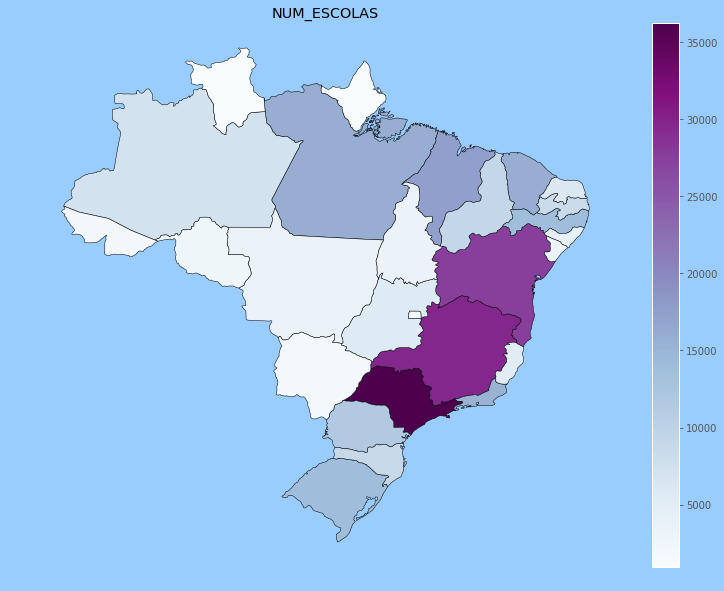

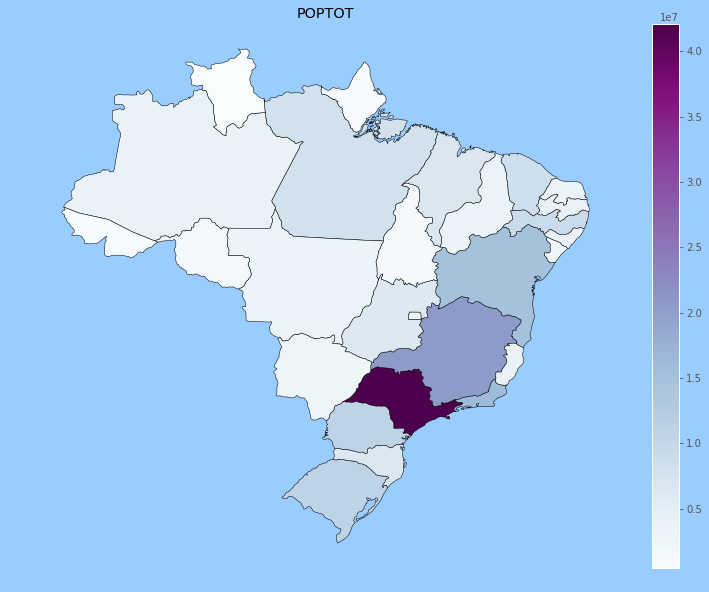

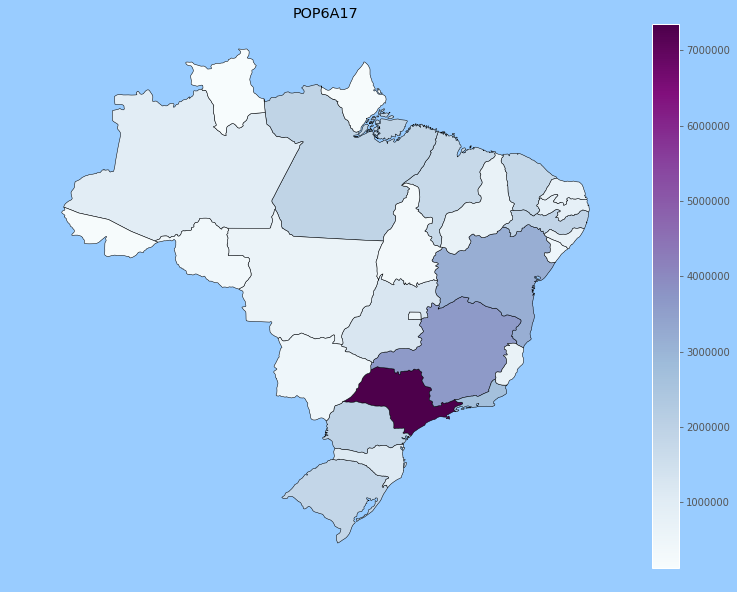

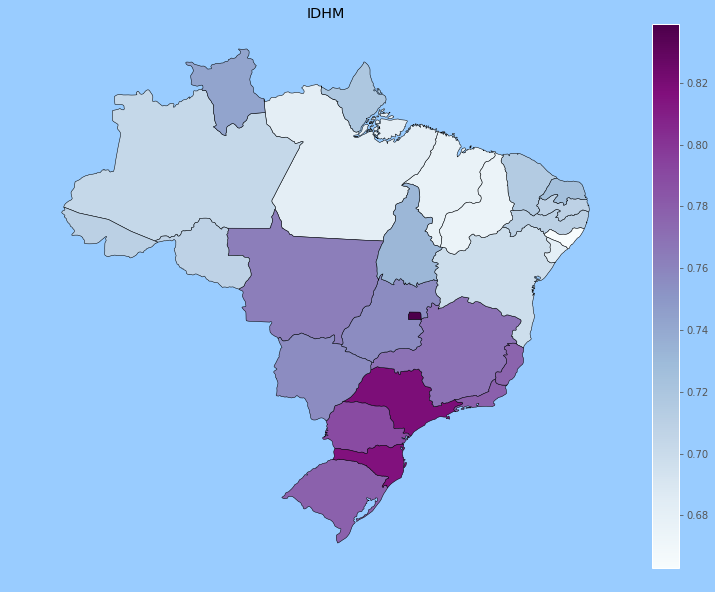

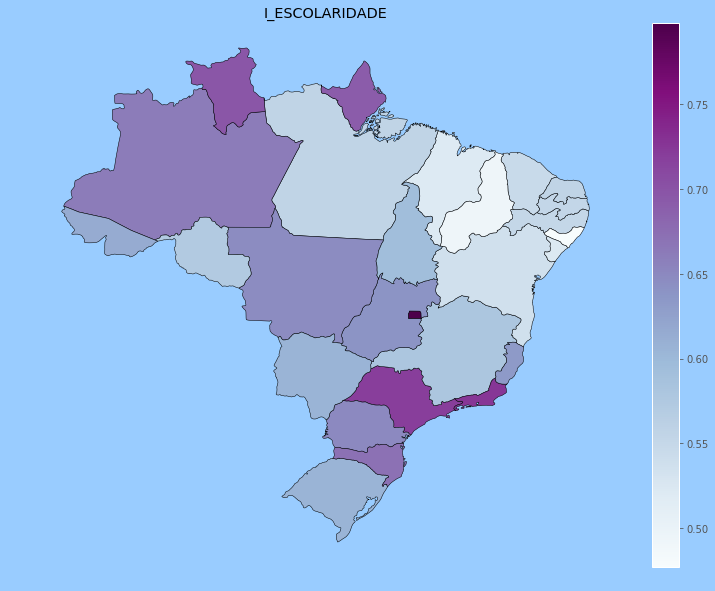

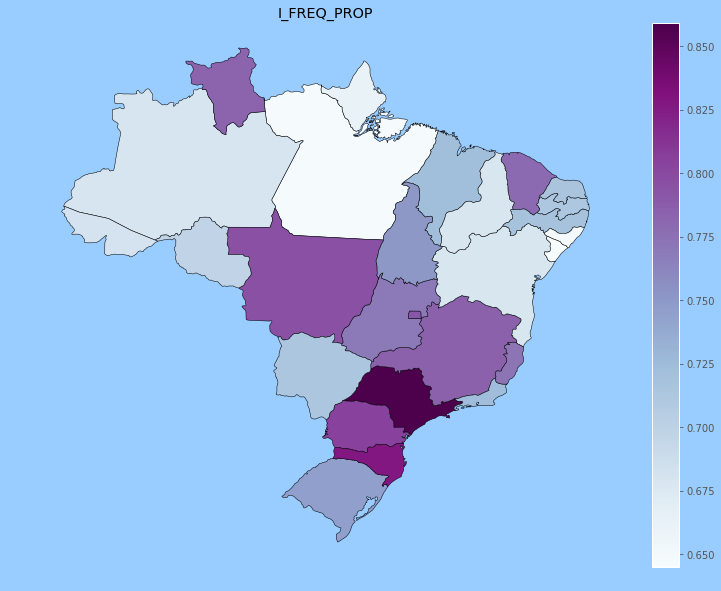

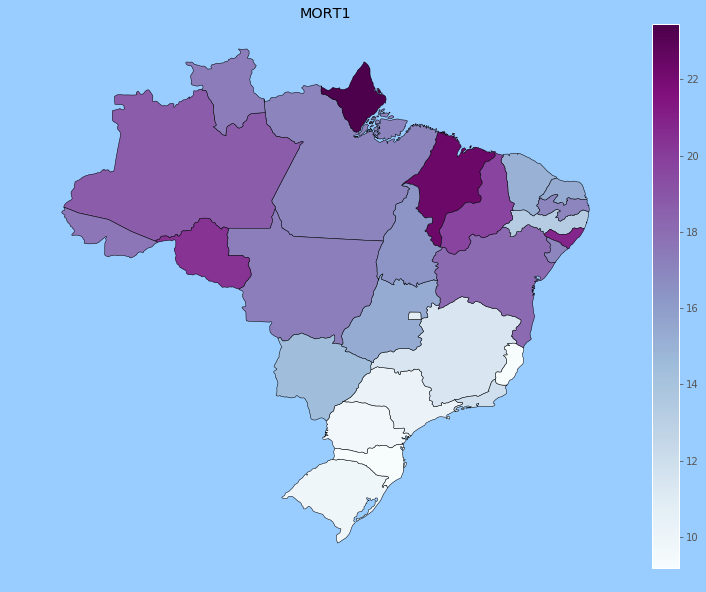

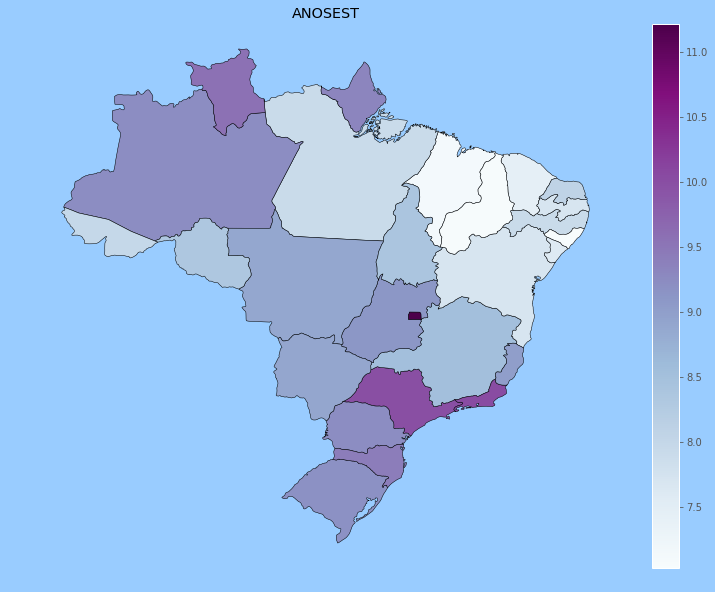

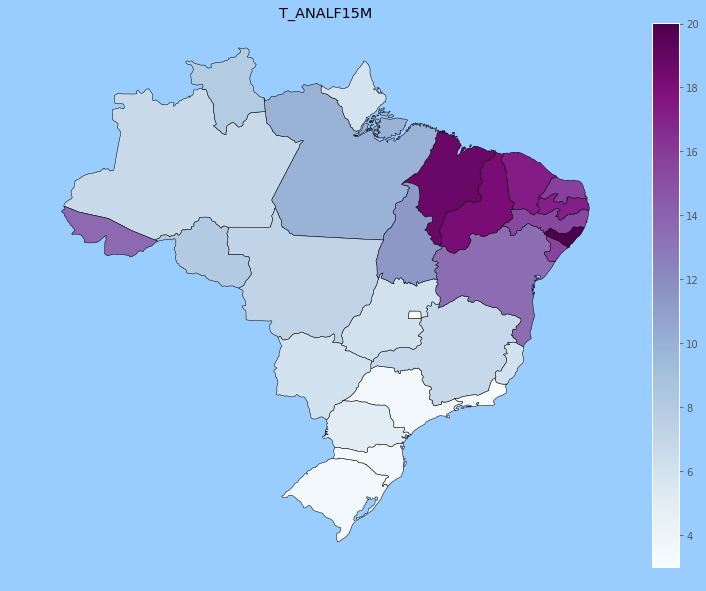

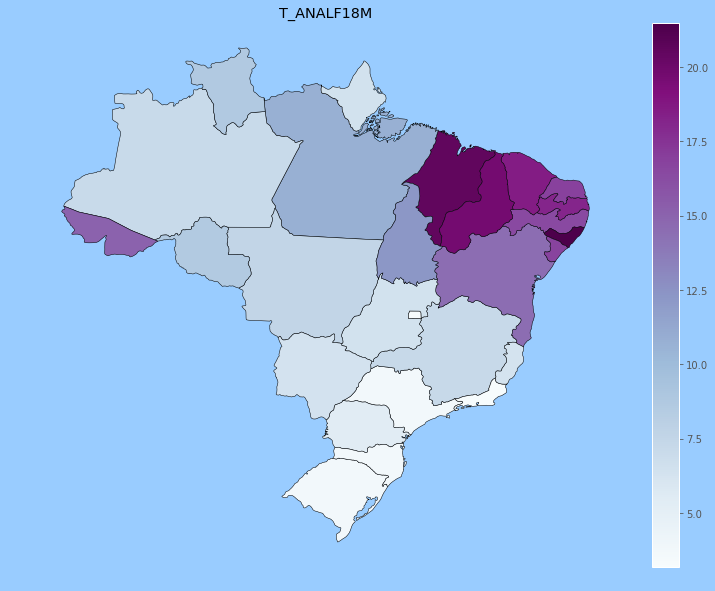

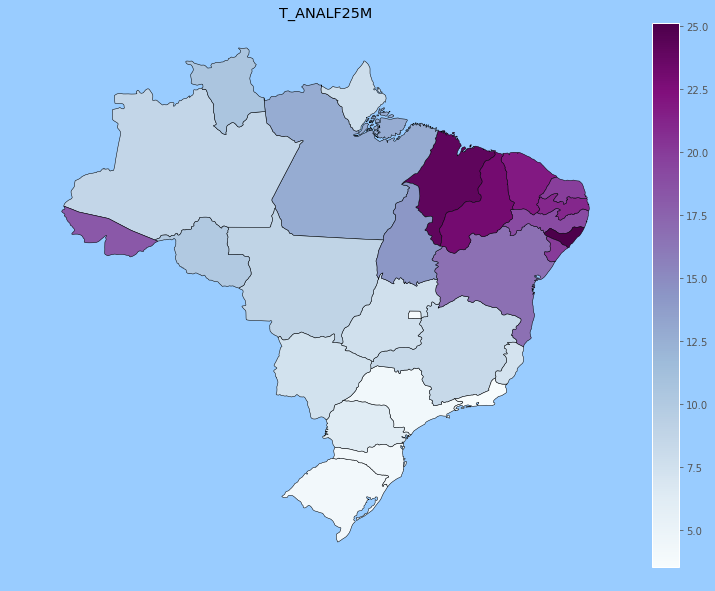

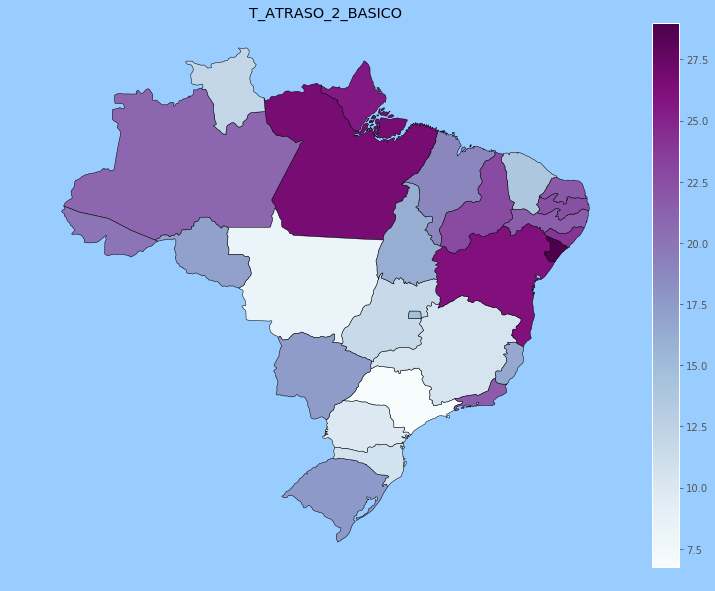

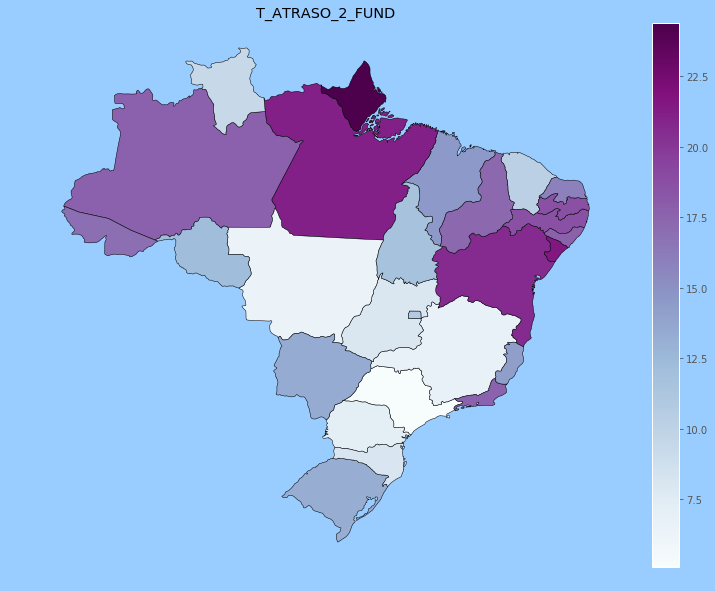

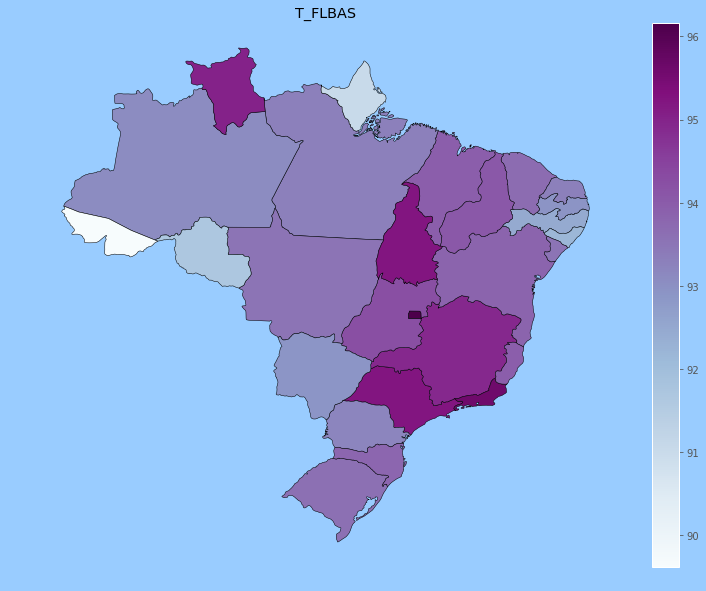

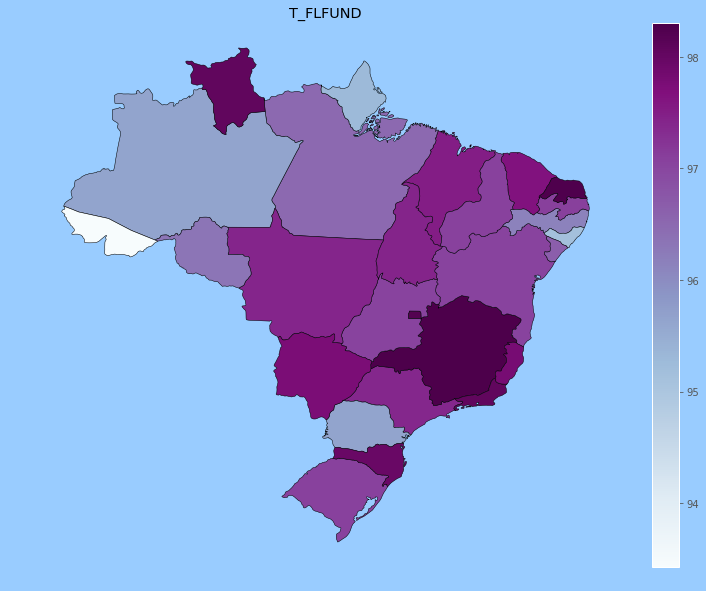

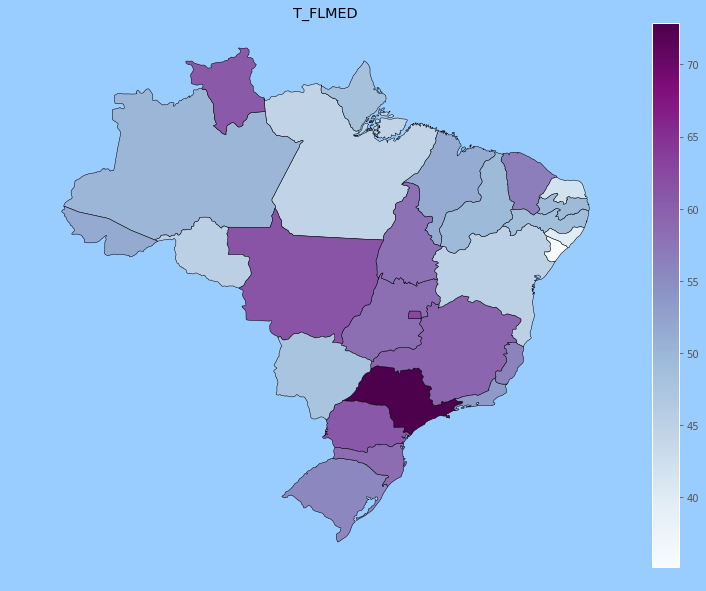

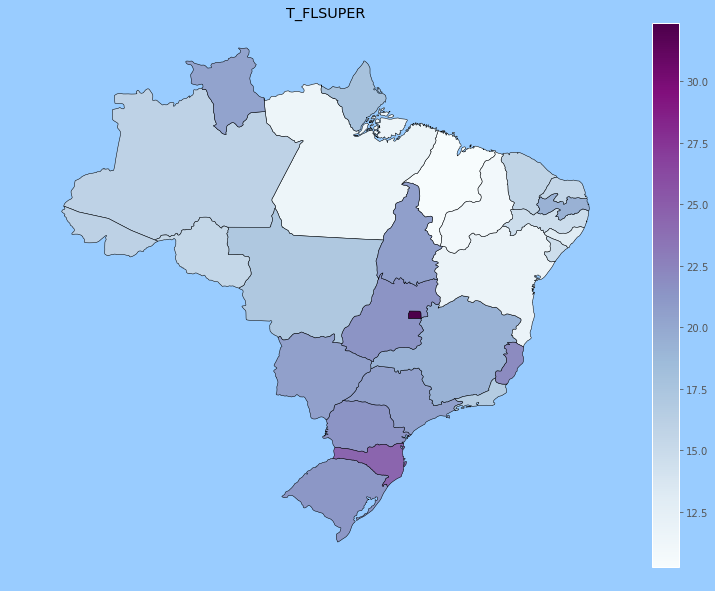

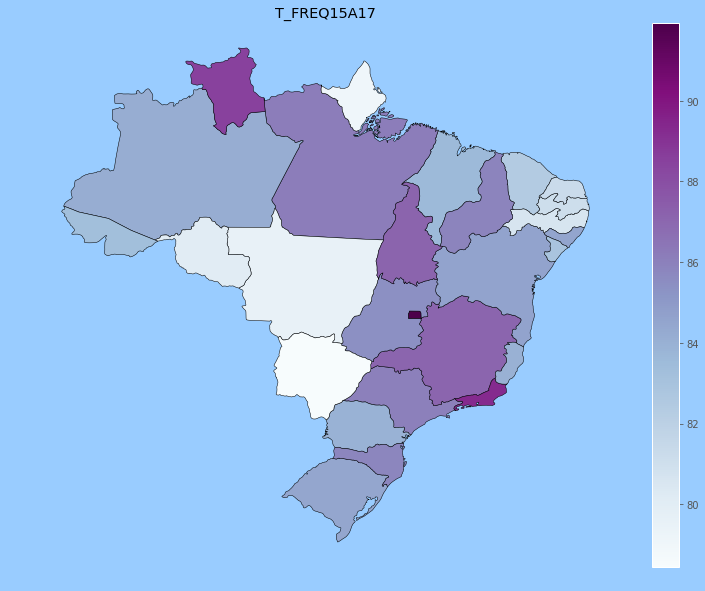

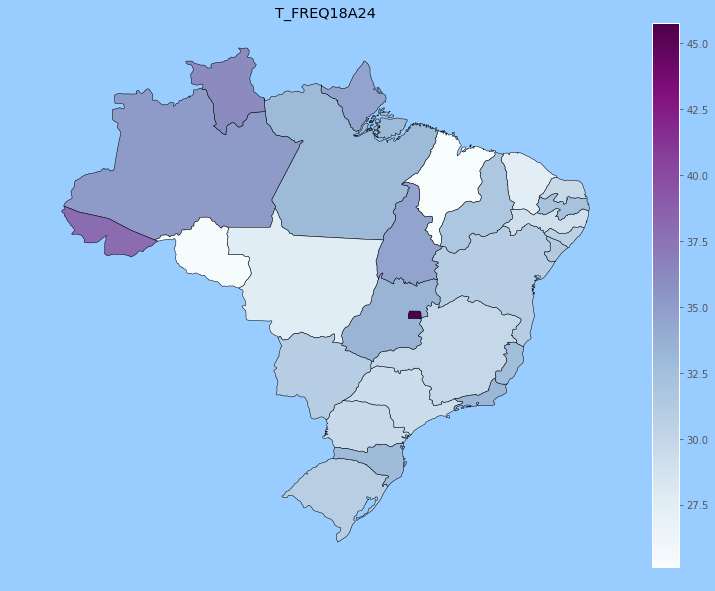

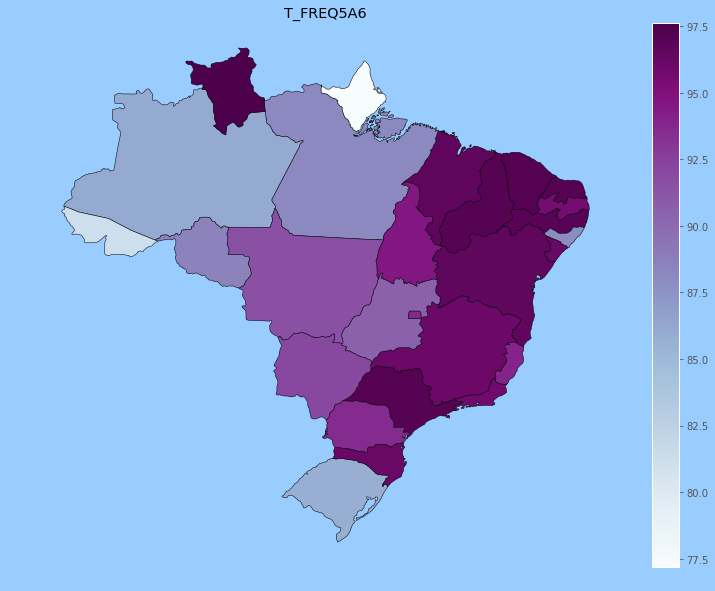

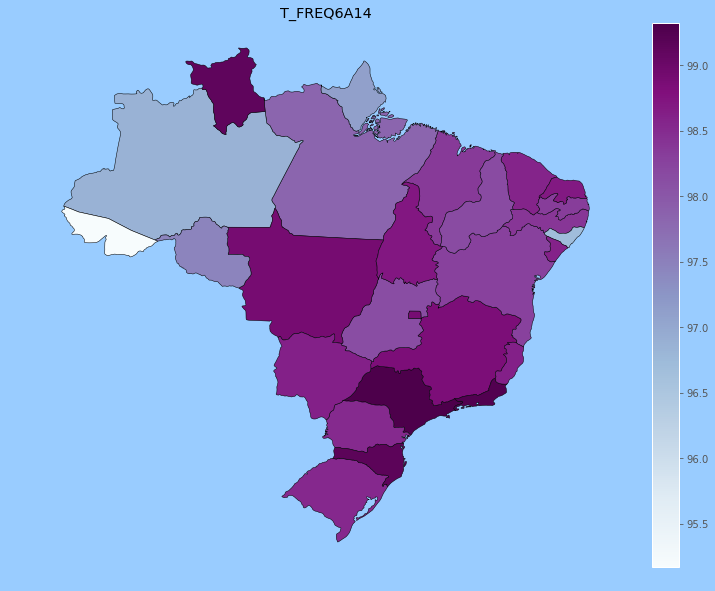

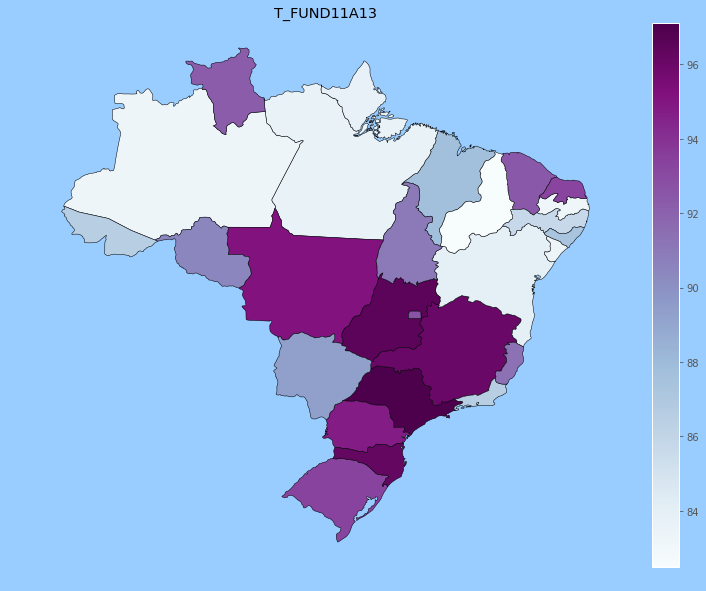

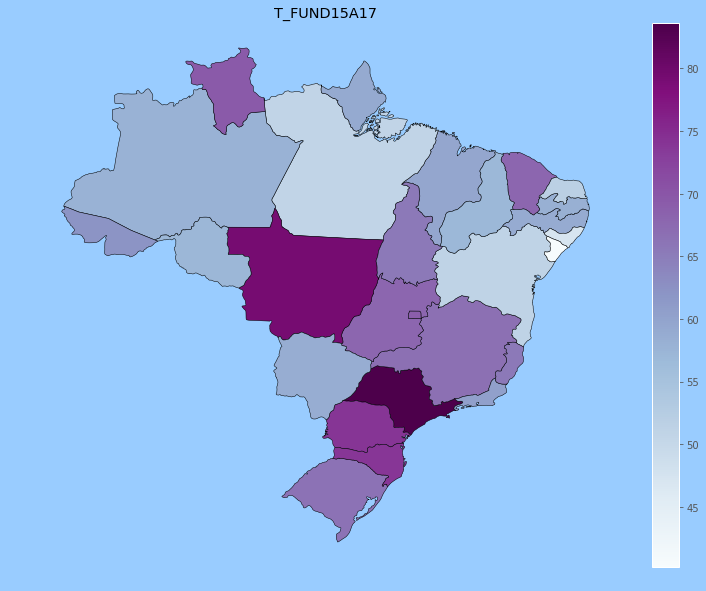

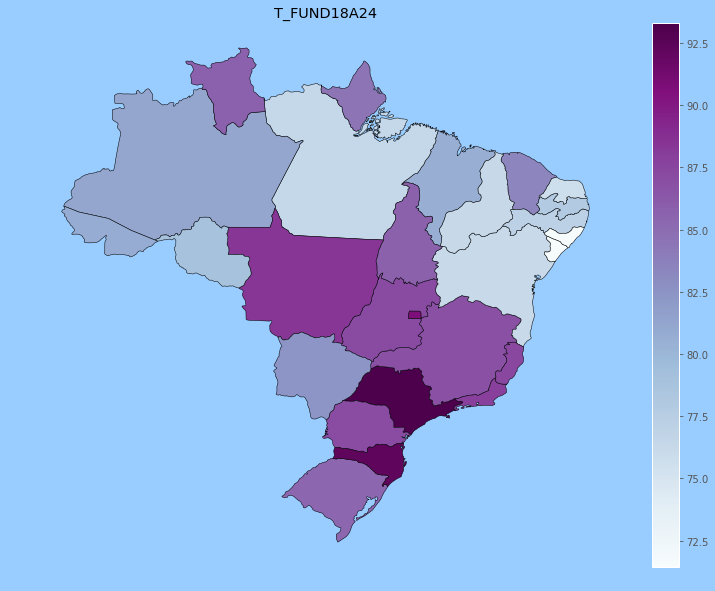

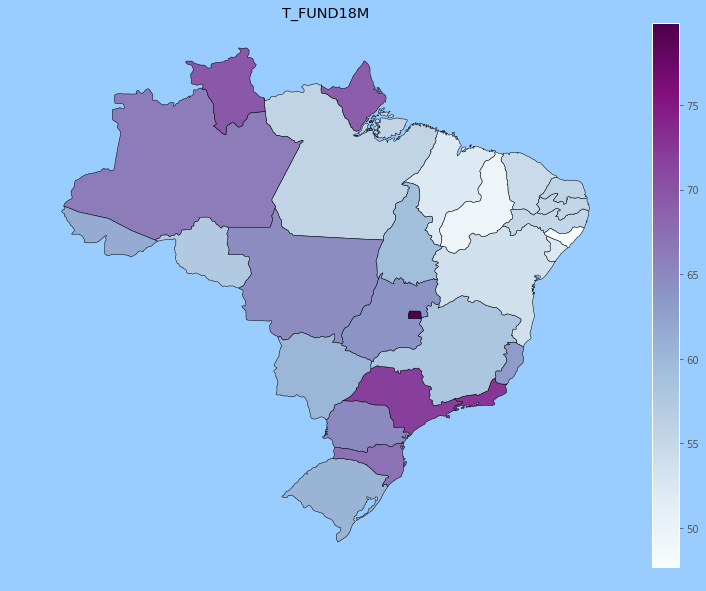

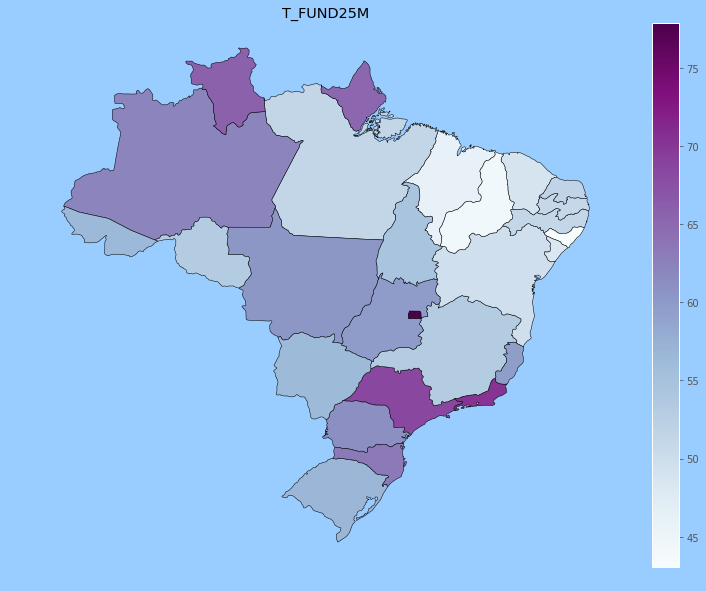

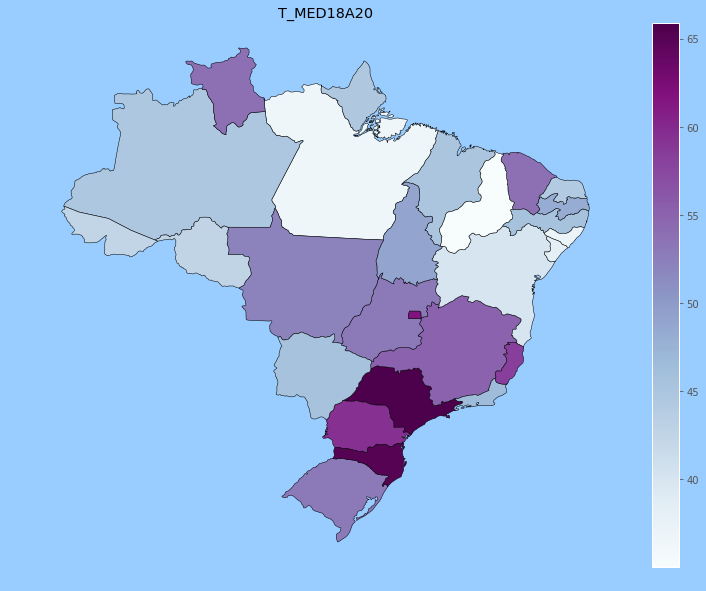

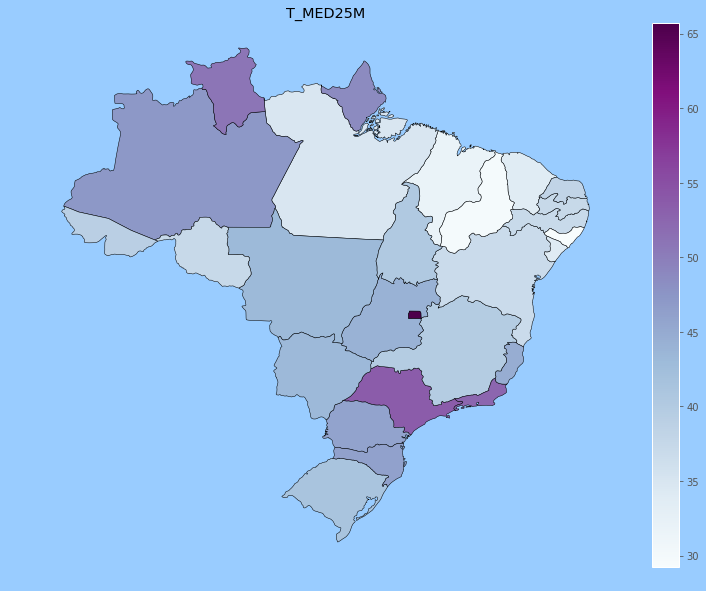

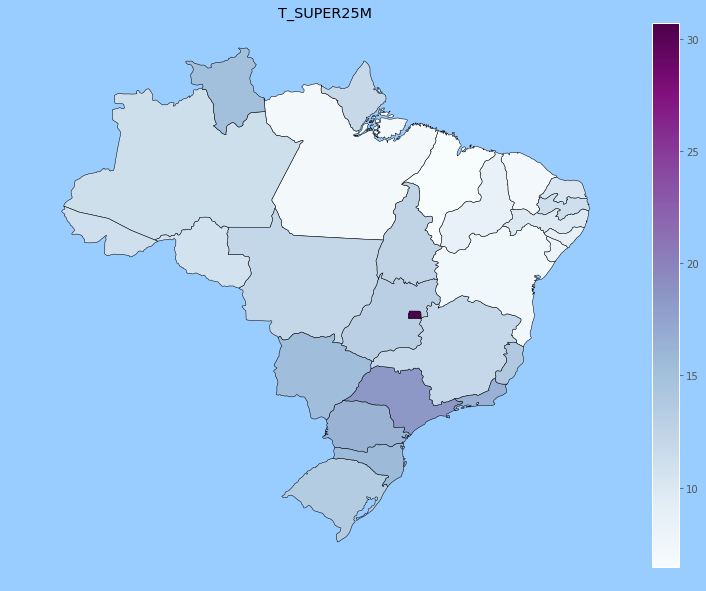

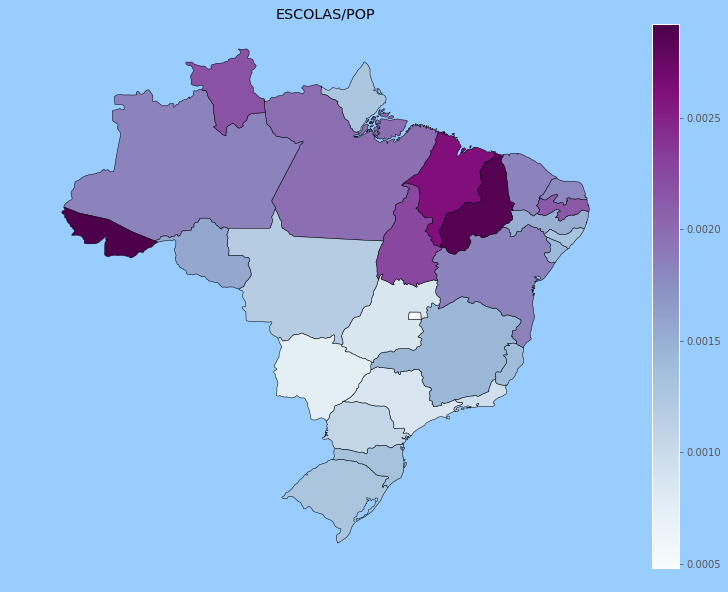

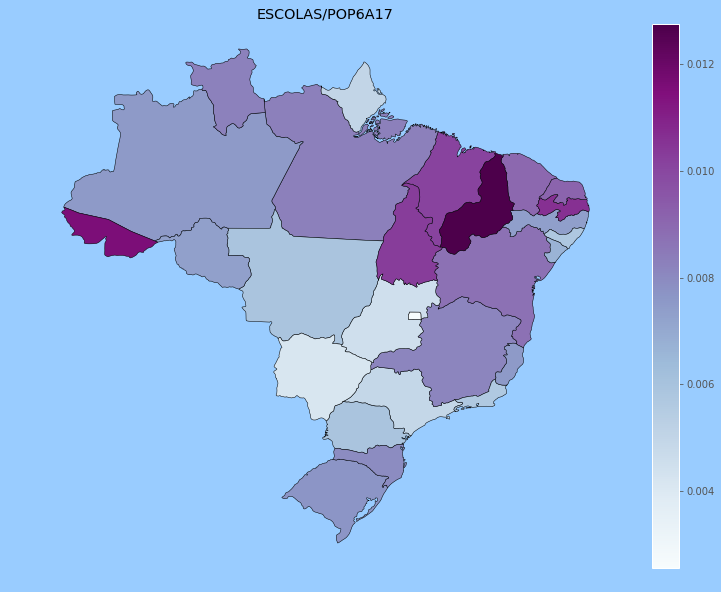

In [25]:
for col in mapa_educacao_2015.columns.drop(['UF', 'ESTADO', 'REGIAO', 'geometry']):
    fig, ax = plt.subplots(figsize=(13, 10), facecolor=(0.6, 0.8, 1))
    _ = mapa_educacao_2015.plot(column=col, ax=ax, cmap='BuPu', legend=True, edgecolor='black')
    _ = plt.axis('off')
    _ = plt.title(col)